In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import shap
import numpy as np
from IPython.display import display

In [7]:
# Load dataset
data = pd.read_csv('survey.csv')

In [8]:
# Display first few rows of the dataset
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [9]:
data.shape

(1259, 27)

In [10]:
data.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [11]:
# Data Preprocessing
# Replace 'NA' strings with actual NaN values
data.replace("NA", pd.NA, inplace=True)

# Drop columns with too many missing values (e.g., 'comments' column)
data.drop(columns=['comments'], inplace=True)

# Fill missing values
data.fillna(data.mode().iloc[0], inplace=True)  # Fill categorical data with mode

In [12]:
data.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0


In [13]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees',
                       'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
                       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
                       'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview',
                       'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Define features and target variable
features = ['Age', 'Gender', 'family_history', 'work_interfere', 'benefits', 'care_options',
            'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
            'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview',
            'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

X = data[features]
y = data['treatment']

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Evaluate the model
y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.7261904761904762

Classification Report:
              precision    recall  f1-score   support

          No       0.73      0.73      0.73       129
         Yes       0.72      0.72      0.72       123

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252


Confusion Matrix:
[[94 35]
 [34 89]]


In [16]:
# Add this after loading data and before train-test split
le_treatment = LabelEncoder()
y = le_treatment.fit_transform(data['treatment'])  # Convert 'Yes'/'No' to 1/0

# Then split using the encoded y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train XGBoost Classifier
xg_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xg_model.fit(X_train, y_train)

# Evaluate the model
y_pred = xg_model.predict(X_test)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.7063492063492064

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       129
           1       0.71      0.67      0.69       123

    accuracy                           0.71       252
   macro avg       0.71      0.71      0.71       252
weighted avg       0.71      0.71      0.71       252


Confusion Matrix:
[[96 33]
 [41 82]]


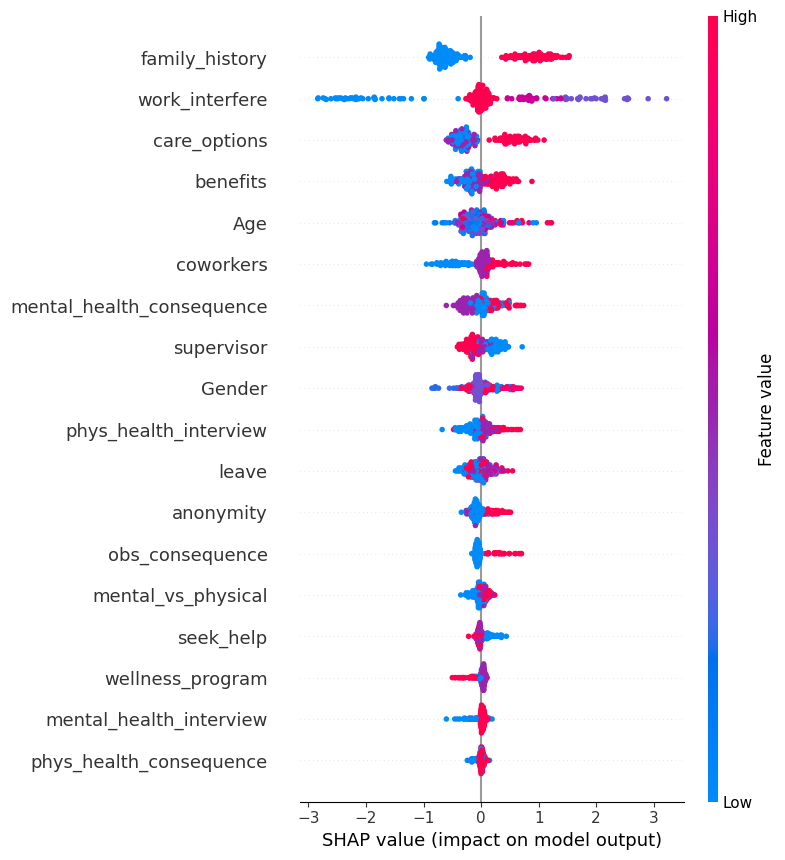

In [18]:
# SHAP Analysis
explainer = shap.TreeExplainer(xg_model)  # Use TreeExplainer for XGBoost
shap_values = explainer.shap_values(X_test)

# Summary plot (global interpretability)
shap.summary_plot(shap_values, X_test)

# Force plot for a single prediction (local interpretability)
display(shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0]))

In [19]:
# Function to predict mental health condition based on user input
def predict_mental_health():
    print("\nWelcome to the Self-Analysis Mental Health Model!")
    print("Please answer the following questions to get a prediction.\n")

    # Collect user input
    age = int(input("Enter your age: "))
    gender = input("Enter your gender (Male/Female/Other): ")
    family_history = input("Do you have a family history of mental illness? (Yes/No): ")
    work_interfere = input("Does work interfere with your mental health? (Often/Sometimes/Rarely/Never): ")
    benefits = input("Does your employer provide mental health benefits? (Yes/No/Don't know): ")
    care_options = input("Do you know the care options available to you? (Yes/No/Not sure): ")
    wellness_program = input("Does your employer offer a wellness program? (Yes/No/Don't know): ")
    seek_help = input("Is it easy to seek help for mental health issues at your workplace? (Yes/No/Don't know): ")
    anonymity = input("Is anonymity protected when seeking mental health help? (Yes/No/Don't know): ")
    leave = input("How easy is it to take leave for mental health reasons? (Very easy/Somewhat easy/Somewhat difficult/Very difficult/Don't know): ")
    mental_health_consequence = input("Have you faced consequences for discussing mental health issues? (Yes/No/Maybe): ")
    phys_health_consequence = input("Have you faced consequences for discussing physical health issues? (Yes/No/Maybe): ")
    coworkers = input("Do your coworkers support mental health discussions? (Yes/No/Some of them): ")
    supervisor = input("Does your supervisor support mental health discussions? (Yes/No/Some of them): ")
    mental_health_interview = input("Would you bring up mental health in an interview? (Yes/No/Maybe): ")
    phys_health_interview = input("Would you bring up physical health in an interview? (Yes/No/Maybe): ")
    mental_vs_physical = input("Do you think mental health is as important as physical health? (Yes/No/Don't know): ")
    obs_consequence = input("Have you observed negative consequences for mental health discussions? (Yes/No): ")

    # Encode user input using the same label encoders
    input_data = {
        'Age': age,
        'Gender': label_encoders['Gender'].transform([gender])[0],
        'family_history': label_encoders['family_history'].transform([family_history])[0],
        'work_interfere': label_encoders['work_interfere'].transform([work_interfere])[0],
        'benefits': label_encoders['benefits'].transform([benefits])[0],
        'care_options': label_encoders['care_options'].transform([care_options])[0],
        'wellness_program': label_encoders['wellness_program'].transform([wellness_program])[0],
        'seek_help': label_encoders['seek_help'].transform([seek_help])[0],
        'anonymity': label_encoders['anonymity'].transform([anonymity])[0],
        'leave': label_encoders['leave'].transform([leave])[0],
        'mental_health_consequence': label_encoders['mental_health_consequence'].transform([mental_health_consequence])[0],
        'phys_health_consequence': label_encoders['phys_health_consequence'].transform([phys_health_consequence])[0],
        'coworkers': label_encoders['coworkers'].transform([coworkers])[0],
        'supervisor': label_encoders['supervisor'].transform([supervisor])[0],
        'mental_health_interview': label_encoders['mental_health_interview'].transform([mental_health_interview])[0],
        'phys_health_interview': label_encoders['phys_health_interview'].transform([phys_health_interview])[0],
        'mental_vs_physical': label_encoders['mental_vs_physical'].transform([mental_vs_physical])[0],
        'obs_consequence': label_encoders['obs_consequence'].transform([obs_consequence])[0]
    }

    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Make prediction
    prediction = model.predict(input_df)
    print(f"\nPrediction: {'Seek Treatment' if prediction[0] == 1 else 'No Treatment Needed'}")

# Run the prediction function
if __name__ == "__main__":
    predict_mental_health()


Welcome to the Self-Analysis Mental Health Model!
Please answer the following questions to get a prediction.

Enter your age: 21
Enter your gender (Male/Female/Other): Male
Do you have a family history of mental illness? (Yes/No): Yes
Does work interfere with your mental health? (Often/Sometimes/Rarely/Never): Sometimes
Does your employer provide mental health benefits? (Yes/No/Don't know): Yes
Do you know the care options available to you? (Yes/No/Not sure): Yes
Does your employer offer a wellness program? (Yes/No/Don't know): Yes
Is it easy to seek help for mental health issues at your workplace? (Yes/No/Don't know): No
Is anonymity protected when seeking mental health help? (Yes/No/Don't know): No
How easy is it to take leave for mental health reasons? (Very easy/Somewhat easy/Somewhat difficult/Very difficult/Don't know): Somewhat easy
Have you faced consequences for discussing mental health issues? (Yes/No/Maybe): No
Have you faced consequences for discussing physical health issu